In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('logs.txt')

df.head()

,set of enemies,run id,gen,train_max.gain,train_mean.gain,train_min.gain,train_std.gain,test_max.gain,test_mean.gain,test_min.gain,test_std.gain
0,7 8,06:11,0,5.2,-81.096,-100.0,33.466,-14.439,-89.161,-119.461,33.434
1,7 8,06:11,1,25.6,-27.912,-90.0,33.200,-4.849,-44.932,-101.953,25.690
2,7 8,06:11,2,25.6,-5.872,-70.0,16.301,-4.849,-26.980,-90.257,13.234
3,7 8,06:11,3,25.6,-2.472,-30.0,11.140,-4.849,-27.800,-47.021,9.237
4,7 8,06:11,4,30.4,0.336,-30.0,8.864,-4.849,-26.766,-44.421,8.619


In [52]:
UNIQUE_ENEMIES = df['set of enemies  '].unique()
N_ENEMIES = len(UNIQUE_ENEMIES)
s = 'set of enemies  '

In [54]:
# line_df = df.groupby([s, 'gen'])[['train_max.gain', 'test_max.gain']].mean().reset_index()
line_df = df
box_df = df.loc[df['gen'] == np.max(df['gen'])][[s, 'train_max.gain', 'test_max.gain']]

display(line_df), display(box_df)

,set of enemies,run id,gen,train_max.gain,train_mean.gain,train_min.gain,train_std.gain,test_max.gain,test_mean.gain,test_min.gain,test_std.gain
0,7 8,06:11,0,5.2,-81.096,-100.0,33.466,-14.439,-89.161,-119.461,33.434
1,7 8,06:11,1,25.6,-27.912,-90.0,33.200,-4.849,-44.932,-101.953,25.690
2,7 8,06:11,2,25.6,-5.872,-70.0,16.301,-4.849,-26.980,-90.257,13.234
3,7 8,06:11,3,25.6,-2.472,-30.0,11.140,-4.849,-27.800,-47.021,9.237
4,7 8,06:11,4,30.4,0.336,-30.0,8.864,-4.849,-26.766,-44.421,8.619
...,...,...,...,...,...,...,...,...,...,...,...
121,4 3,15:27,16,0.0,-12.000,-60.0,18.868,-17.440,-27.597,-48.120,8.233
122,4 3,15:27,17,0.0,-18.200,-70.0,20.851,-16.656,-31.500,-52.849,10.152
123,4 3,15:27,18,0.0,-15.800,-60.0,19.605,-13.944,-31.264,-48.989,9.170
124,4 3,15:27,19,0.0,-15.800,-60.0,17.446,-16.242,-34.392,-98.067,12.804


,set of enemies,train_max.gain,test_max.gain
20,7 8,32.8,-4.087
41,7 8,58.0,-20.920
62,5 2,82.0,-16.452
83,5 2,72.4,-6.354
104,4 3,13.0,-5.834
125,4 3,0.0,-5.651


(None, None)

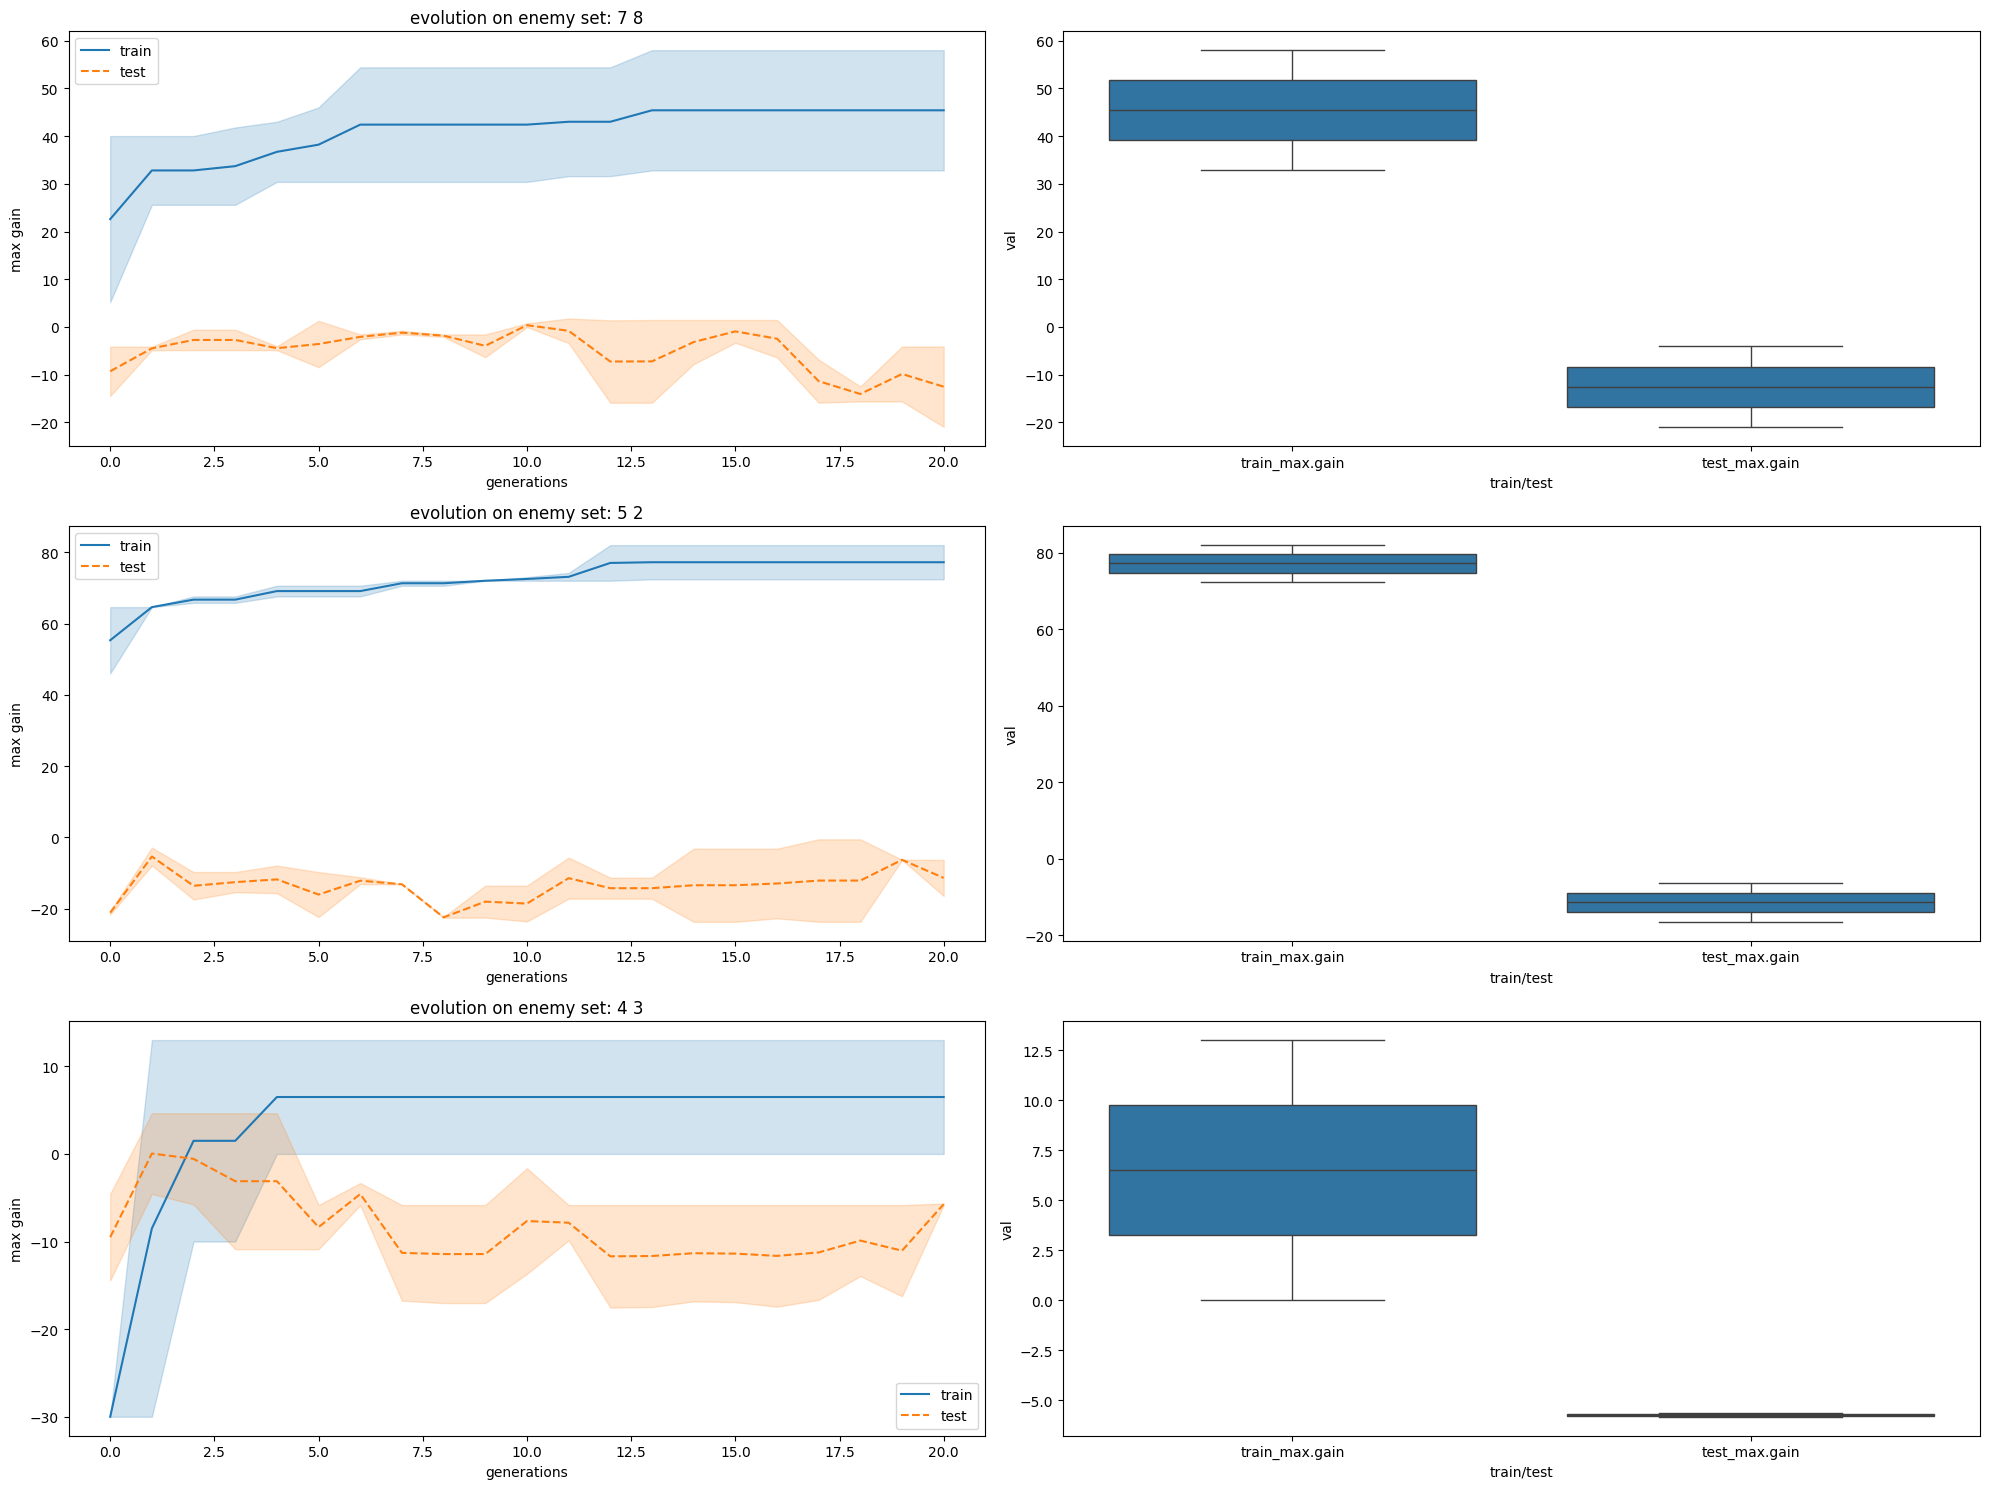

In [69]:
fig, axs = plt.subplots(nrows=N_ENEMIES, ncols=2, figsize=(20, 15))

for i, e_set in enumerate(UNIQUE_ENEMIES):

    ax = axs[i, :]

    line_enemy_data = line_df[line_df[s] == e_set]
    box_enemy_data = box_df[box_df[s] == e_set].drop(s, axis = 1).melt(var_name ='train/test', value_name = 'val')

    sns.lineplot(ax = ax[0], data = line_enemy_data, x = 'gen', y='train_max.gain', label = 'train')
    sns.lineplot(ax = ax[0], data = line_enemy_data, x = 'gen', y='test_max.gain', label = 'test', linestyle = 'dashed')
    sns.boxplot(ax = ax[1], data = box_enemy_data, x = 'train/test', y='val')

    ax[0].set_title(f'evolution on enemy set: {e_set}')
    ax[0].set_ylabel('max gain')
    ax[0].set_xlabel('generations')
    # ax[0].get_legend().remove()

plt.tight_layout()
plt.show()